In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("medical_examination.csv")

In [14]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['bmi'] > 25).astype(int)

In [15]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)


In [16]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat.columns = ['cardio', 'variable', 'value']

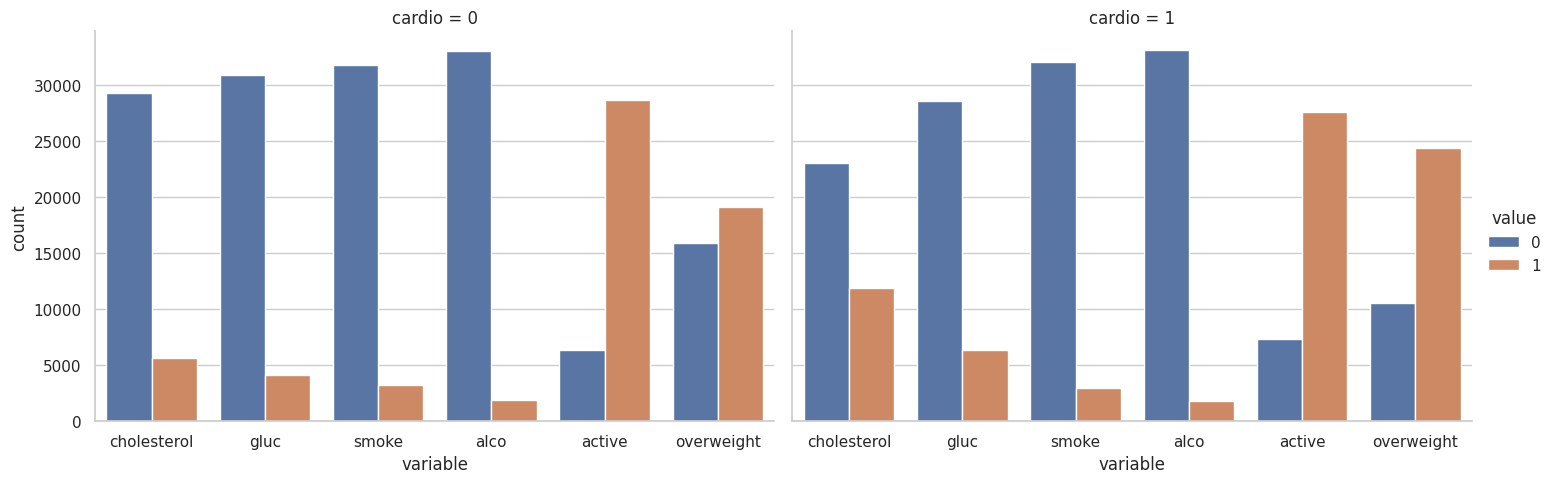

In [17]:
sns.set(style="whitegrid")
fig = sns.catplot(x="variable", hue="value", col="cardio", data=df_cat, kind="count", height=5, aspect=1.5)

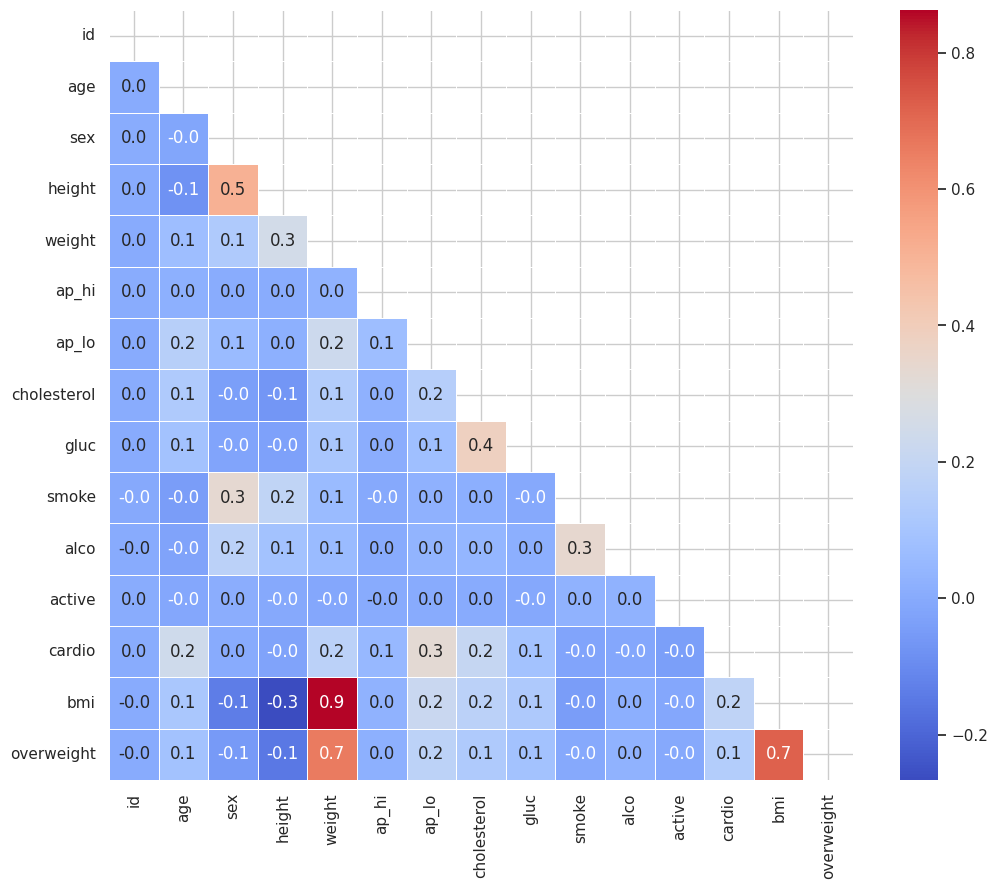

In [18]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975))]
corr = df_heat.corr()

mask = np.triu(corr)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.show()
